In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,Normalizer,MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.tree import DecisionTreeClassifier


In [53]:
df = pd.read_csv("../ready_to_model_data.csv")
df=df.drop(columns="Unnamed: 0")
df

,PROMISE_STATUS_O,EXTENSION_ELIGIBLE_Y,F0223_NUMBER_OF_EXTENSIONS,lastchannel_Z,REM_TM_RAT_OBS,ApplicantFICOScore,Appl_Debt,F0066_CONTACT_NO_PROMISE_COUNT,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,...,DepreciationRate,Appl_Income,PTI_BOOKED,SalesTax,DOWN_CASH,FINANCED_AMOUNT,F0089_PROMISE_AMT_1,F0180_CURRENT_INTEREST_RATE,BAL_RAT_TRN_6.1,DPD_bool
0,0.0,0.0,3.0,1.0,0.0,0.0,1075.05,12.0,5.0,25.0,...,0.694261,4138.00,0.0964,708.22,0.0,15057.22,382.68,0.1999,0.01,False
1,0.0,1.0,0.0,1.0,0.0,0.0,1138.75,3.0,45.0,3.0,...,0.776757,4166.67,0.1006,0.00,3500.0,20095.17,419.21,0.1425,0.03,False
2,0.0,1.0,0.0,1.0,0.0,551.0,767.83,0.0,3.0,3.0,...,0.834200,2833.33,0.1525,1916.82,5000.0,18764.82,432.01,0.1808,0.03,False
3,1.0,0.0,2.0,1.0,0.0,468.0,1071.20,14.0,-11.0,10.0,...,0.810160,4000.00,0.0903,0.00,3000.0,15077.00,361.22,0.1970,0.02,False
4,0.0,1.0,0.0,1.0,0.0,523.0,726.64,2.0,80.0,7.0,...,0.810160,2069.02,0.1354,880.60,3000.0,10200.54,280.21,0.2134,0.05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62933,0.0,0.0,2.0,1.0,0.0,496.0,1808.27,4.0,17.0,7.0,...,0.776757,4991.09,0.0877,1040.82,2000.0,17252.97,437.95,0.1800,0.01,False
62934,1.0,1.0,0.0,1.0,0.0,458.0,720.43,1.0,-16.0,9.0,...,0.856943,2218.75,0.1728,841.68,2100.0,15382.68,402.48,0.2140,0.03,False
62935,0.0,1.0,1.0,1.0,0.0,567.0,852.94,3.0,320.0,13.0,...,0.629297,2810.34,0.1321,872.19,1500.0,15924.07,371.17,0.1650,0.04,False
62936,0.0,0.0,4.0,1.0,0.0,447.0,1026.95,11.0,31.0,16.0,...,0.629297,3704.74,0.1338,1152.30,4000.0,18715.30,500.00,0.2425,0.00,True


In [54]:
df["DPD_bool"]=df["DPD_bool"].map({True:1,False:0})
df

,PROMISE_STATUS_O,EXTENSION_ELIGIBLE_Y,F0223_NUMBER_OF_EXTENSIONS,lastchannel_Z,REM_TM_RAT_OBS,ApplicantFICOScore,Appl_Debt,F0066_CONTACT_NO_PROMISE_COUNT,F0315_DAYS_SINCE_LAST_PROMISE_1,F0065_PROMISES_TAKEN_COUNT,...,DepreciationRate,Appl_Income,PTI_BOOKED,SalesTax,DOWN_CASH,FINANCED_AMOUNT,F0089_PROMISE_AMT_1,F0180_CURRENT_INTEREST_RATE,BAL_RAT_TRN_6.1,DPD_bool
0,0.0,0.0,3.0,1.0,0.0,0.0,1075.05,12.0,5.0,25.0,...,0.694261,4138.00,0.0964,708.22,0.0,15057.22,382.68,0.1999,0.01,0
1,0.0,1.0,0.0,1.0,0.0,0.0,1138.75,3.0,45.0,3.0,...,0.776757,4166.67,0.1006,0.00,3500.0,20095.17,419.21,0.1425,0.03,0
2,0.0,1.0,0.0,1.0,0.0,551.0,767.83,0.0,3.0,3.0,...,0.834200,2833.33,0.1525,1916.82,5000.0,18764.82,432.01,0.1808,0.03,0
3,1.0,0.0,2.0,1.0,0.0,468.0,1071.20,14.0,-11.0,10.0,...,0.810160,4000.00,0.0903,0.00,3000.0,15077.00,361.22,0.1970,0.02,0
4,0.0,1.0,0.0,1.0,0.0,523.0,726.64,2.0,80.0,7.0,...,0.810160,2069.02,0.1354,880.60,3000.0,10200.54,280.21,0.2134,0.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62933,0.0,0.0,2.0,1.0,0.0,496.0,1808.27,4.0,17.0,7.0,...,0.776757,4991.09,0.0877,1040.82,2000.0,17252.97,437.95,0.1800,0.01,0
62934,1.0,1.0,0.0,1.0,0.0,458.0,720.43,1.0,-16.0,9.0,...,0.856943,2218.75,0.1728,841.68,2100.0,15382.68,402.48,0.2140,0.03,0
62935,0.0,1.0,1.0,1.0,0.0,567.0,852.94,3.0,320.0,13.0,...,0.629297,2810.34,0.1321,872.19,1500.0,15924.07,371.17,0.1650,0.04,0
62936,0.0,0.0,4.0,1.0,0.0,447.0,1026.95,11.0,31.0,16.0,...,0.629297,3704.74,0.1338,1152.30,4000.0,18715.30,500.00,0.2425,0.00,1


In [95]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["DPD_bool","F0381_DAYS_DELINQUENT_360","D5P_TOT_1"]),df["DPD_bool"],test_size=0.2)


In [108]:
scaler = StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm =scaler.transform(X_test)

In [97]:
dt_1 = DecisionTreeClassifier(max_depth=2,random_state=42)
dt_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

<ipython-input-98-e5bd75ac8836>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


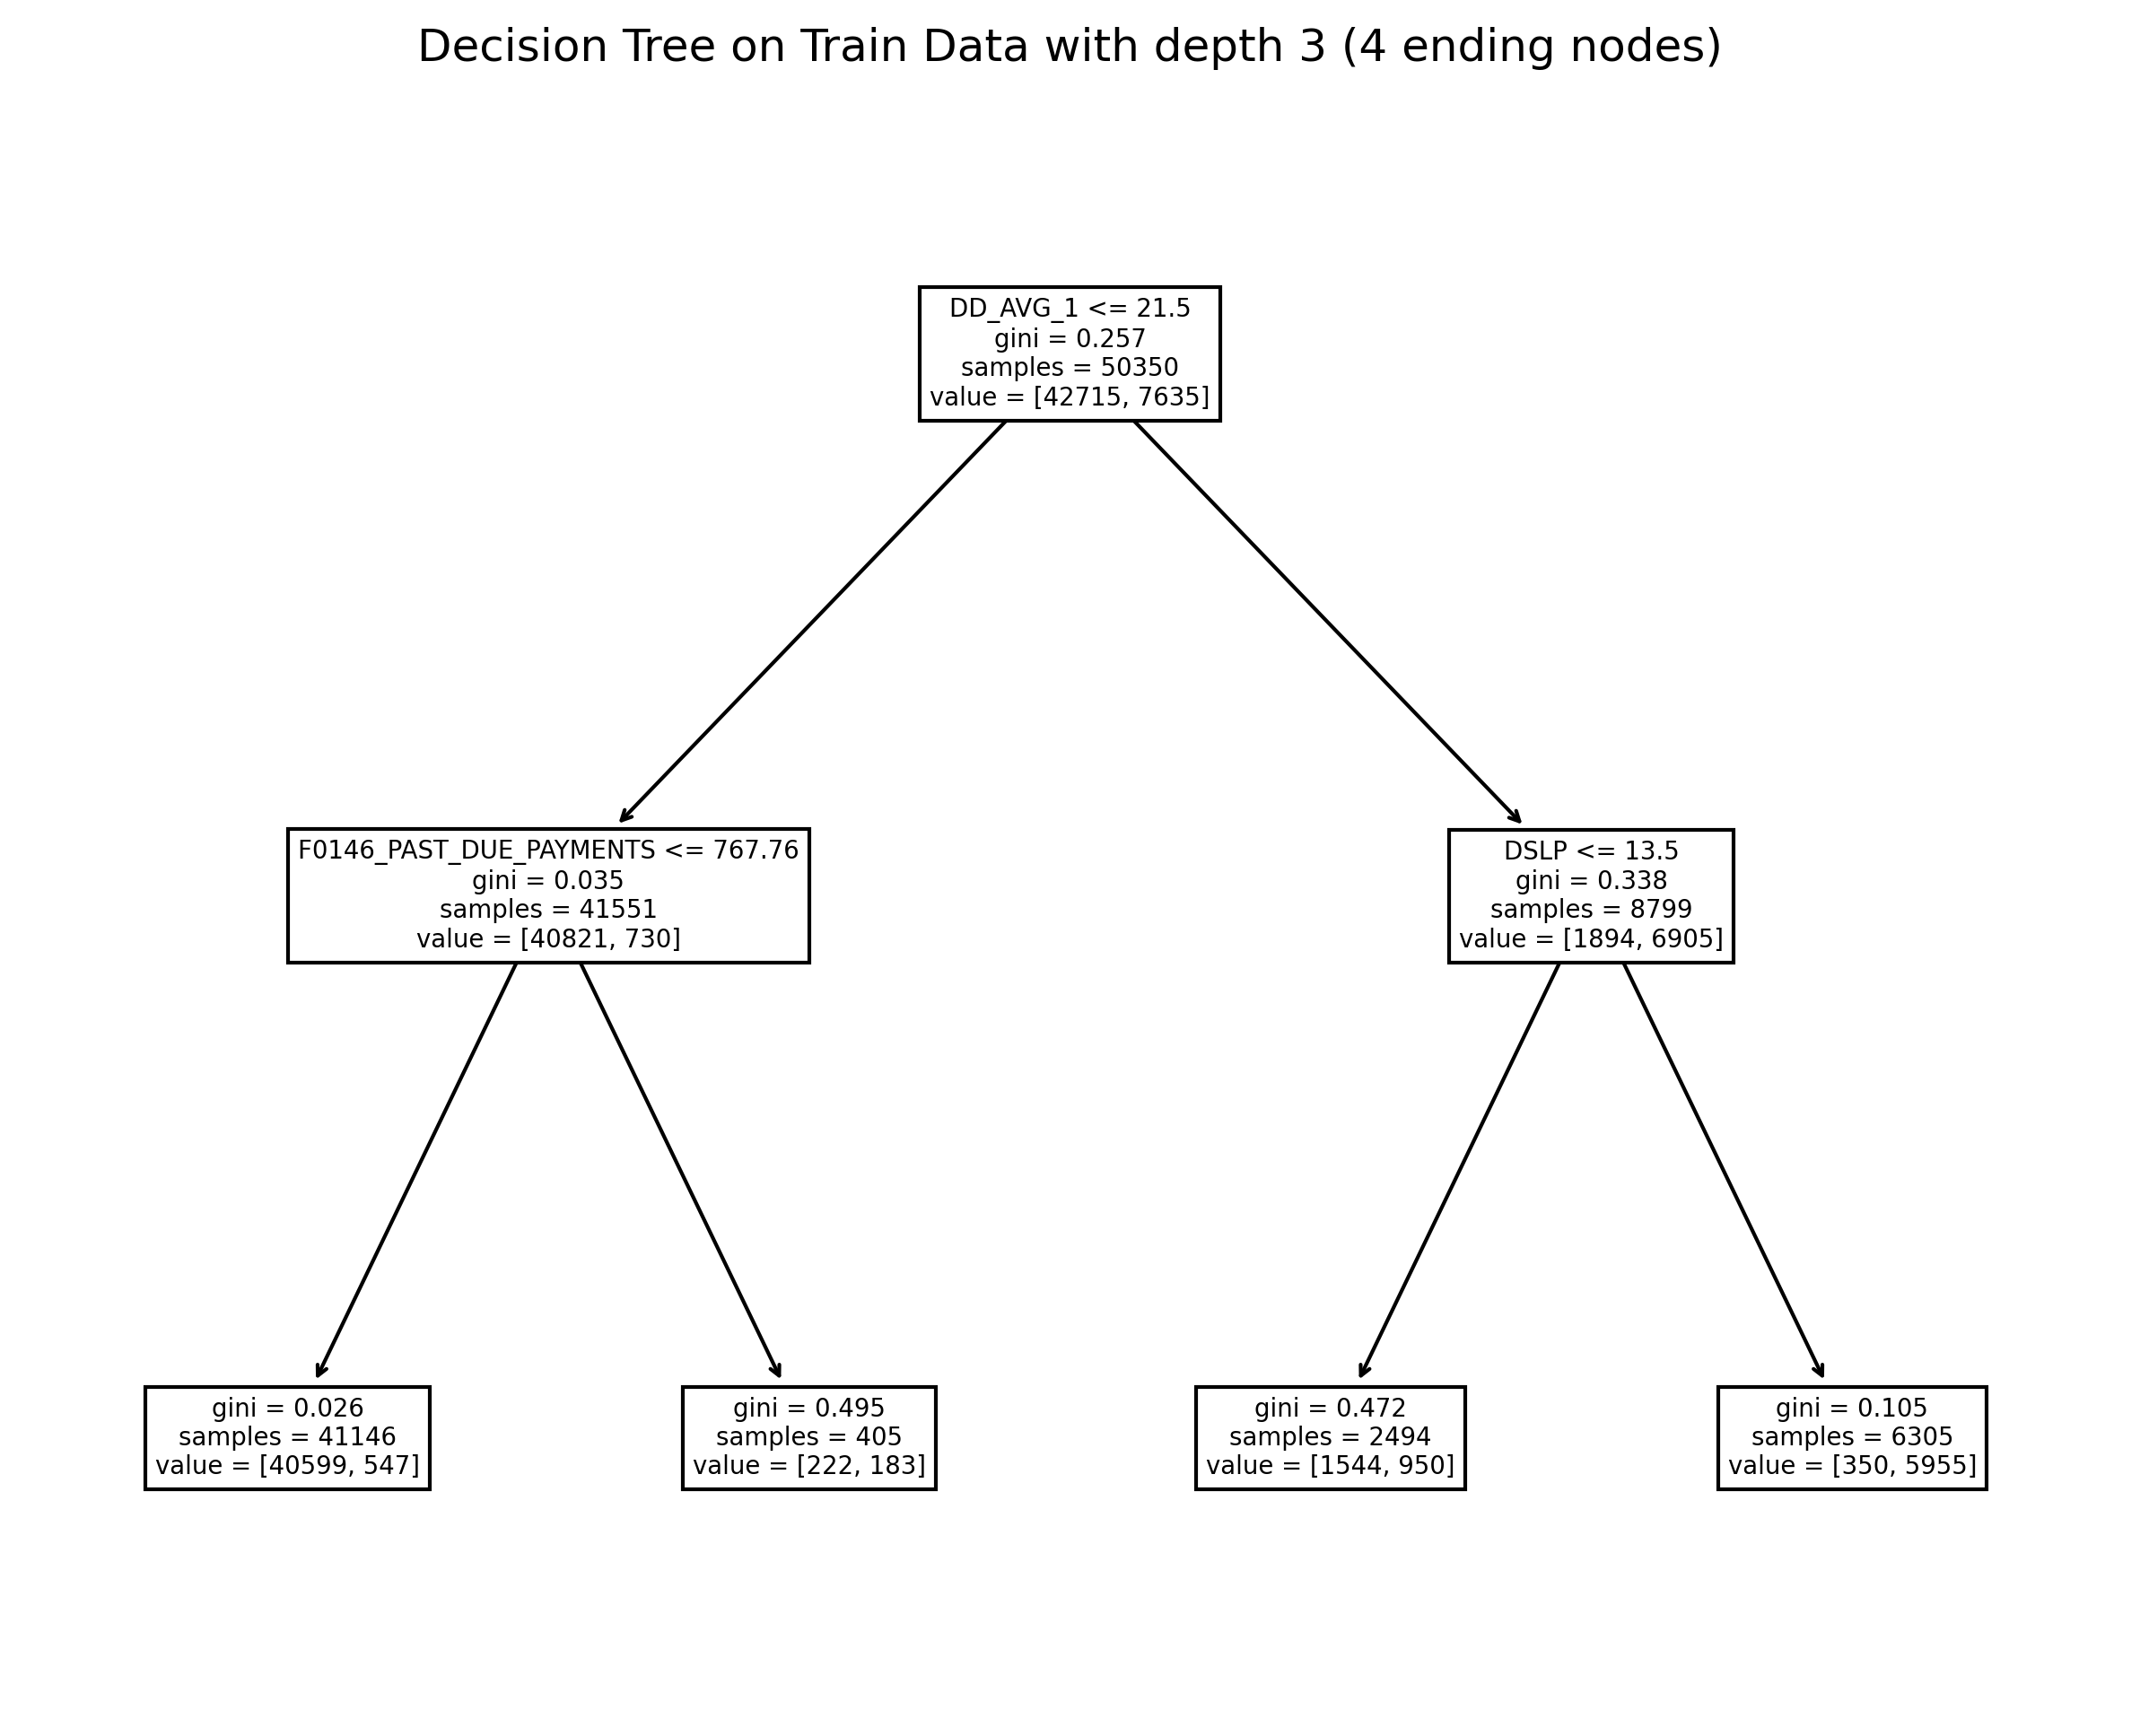

In [98]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(dt_1,feature_names=X_train.columns)
axes.title.set_text("Decision Tree on Train Data with depth 3 (4 ending nodes)")
fig.savefig("../images/Decision_tree_train_model.png")
fig.show()


In [99]:
y_train_output= dt_1.predict(X_train)
print("Train data Accuracy - Decision Tree")
print(classification_report(y_train,y_train_output))
print("\nROC Score :")
print(roc_auc_score(y_train,y_train_output))

Train data Accuracy - Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42715
           1       0.94      0.78      0.85      7635

    accuracy                           0.96     50350
   macro avg       0.95      0.89      0.92     50350
weighted avg       0.96      0.96      0.96     50350


ROC Score :
0.8858834321784147


In [100]:
y_test_output = dt_1.predict(X_test)
print("Test data Accuracy - Decision Tree")
print(classification_report(y_test,y_test_output))
print("\nROC Score :")
print(roc_auc_score(y_test,y_test_output))

Test data Accuracy - Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10596
           1       0.94      0.78      0.85      1992

    accuracy                           0.96     12588
   macro avg       0.95      0.89      0.91     12588
weighted avg       0.96      0.96      0.96     12588


ROC Score :
0.8852471039310128


In [101]:
#Let's do Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_norm,y_train)


LogisticRegression()

In [102]:
y_train_output_lr=lr.predict(X_train_norm)
print("Train data Accuracy")
print(classification_report(y_train,y_train_output_lr))

Train data Accuracy
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     42715
           1       0.95      0.93      0.94      7635

    accuracy                           0.98     50350
   macro avg       0.97      0.96      0.97     50350
weighted avg       0.98      0.98      0.98     50350



In [103]:
roc_auc_score(y_train,y_train_output_lr)


0.9601327726043397

In [104]:
y_test_output_lr=lr.predict(X_test)
print("Test data Accuracy")
print(classification_report(y_test,y_test_output_lr))

Test data Accuracy
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     10596
           1       1.00      0.08      0.16      1992

    accuracy                           0.86     12588
   macro avg       0.93      0.54      0.54     12588
weighted avg       0.88      0.86      0.80     12588



In [105]:
roc_auc_score(y_test,y_test_output_lr)

0.5421686746987951

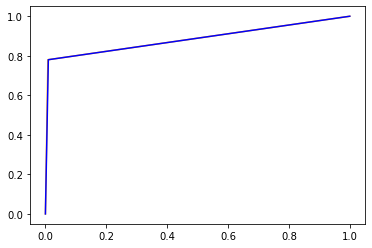

In [106]:
fpr,tpr,threshold = roc_curve(y_train,y_train_output)
fpr1,tpr1,threshold1=roc_curve(y_test,y_test_output)
plt.plot(fpr, tpr,color='orange', label='Decision Tree AUC-ROC curve')
plt.plot(fpr1, tpr1,color='blue', label='Decision Tree AUC-ROC curve')


In [109]:
#xgboost model

import xgboost as xgb
xg_1 = xgb.XGBClassifier(n_estimators=50)
xg_1

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [110]:
xg_1.fit(X_train_norm,y_train)
y_train_output_xg=xg_1.predict(X_train_norm)
roc_auc_score(y_train,y_train_output_xg)

/Users/sankar/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:53:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9998642791760102

In [111]:
X_train_norm=pd.DataFrame(X_train_norm,columns=X_train.columns)
X_test_norm=pd.DataFrame(X_test_norm,columns=X_test.columns)

In [112]:
val={'Feature':X_train_norm.columns,'Importance':xg_1.feature_importances_}
imp_features_df=pd.DataFrame(val)
imp_features_df.sort_values(by="Importance",ascending=False)

,Feature,Importance
24,DD_AVG_1,0.378139
16,DSLP,0.326901
25,BAL_RAT_TRN_6,0.044470
23,D31P_TOT_6,0.037978
15,F0146_PAST_DUE_PAYMENTS,0.029558
0,PROMISE_STATUS_O,0.025184
13,F0320_TODAY_MINUS_DAYS_LAST_MONETARY,0.016263
4,REM_TM_RAT_OBS,0.015713
18,PMT_RAT_OBS,0.015669
8,F0315_DAYS_SINCE_LAST_PROMISE_1,0.012818


In [114]:
final_columns=imp_features_df[imp_features_df["Importance"]>0.01]
final_columns

,Feature,Importance
0,PROMISE_STATUS_O,0.025184
4,REM_TM_RAT_OBS,0.015713
8,F0315_DAYS_SINCE_LAST_PROMISE_1,0.012818
13,F0320_TODAY_MINUS_DAYS_LAST_MONETARY,0.016263
14,BALANCE_PERCENT_LOAN,0.011370
15,F0146_PAST_DUE_PAYMENTS,0.029558
16,DSLP,0.326901
18,PMT_RAT_OBS,0.015669
23,D31P_TOT_6,0.037978
24,DD_AVG_1,0.378139


In [120]:
xg_2=xgb.XGBClassifier(n_estimators=50)
xg_2.fit(X_train_norm[final_columns["Feature"]],y_train)
y_train_output_xg2=xg_2.predict(X_train_norm[final_columns["Feature"]])

/Users/sankar/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:00:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [121]:
print("\nTrain Data AUC Score : ")
roc_auc_score(y_train,y_train_output_xg2)


Train Data AUC Score : 


0.998245433689933

In [122]:
print("\Test Data AUC Score : ")
roc_auc_score(y_test,xg_2.predict(X_test_norm[final_columns["Feature"]]))

\Test Data AUC Score : 


0.9902219296210891

In [130]:
#Grid Search
from sklearn.model_selection import GridSearchCV
xgb_gcv=xgb.XGBClassifier()

In [135]:
params = {
        'max_depth': [3, 4, 5, 6],
        'learning_rate' : [0.1,0.01,1,0.001],
        'n_estimators' : [50,100,150,200]
}

In [136]:
grid=GridSearchCV(estimator=xgb_gcv,param_grid=params,scoring='roc_auc',n_jobs=4)
# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3 )


In [137]:
grid.fit(X_train_norm[final_columns],y_train,verbose=100)

/Users/sankar/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:16:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [ ]:
print("XGBoost Grid Search All Results")
grid.cv_results_